In [228]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [199]:
#load dataset
data = pd.read_csv('C:/Users/raiqa/github/Dubai_UG-16/data/dataset/feature_selection/resample_encoded_20_features.csv')

In [201]:
#preprocessing
X = data.drop(columns=['HeartDisease_Yes'])  # Drop the target column
Y= data['HeartDisease_Yes']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
#dimensionality reduction
pca = PCA(n_components=2)  # For 2D visualization
X_pca = pca.fit_transform(X_scaled)

In [205]:
# Define range for the number of clusters
num_clusters_range = range(2, 10)
bic_scores = []

In [207]:
for k in num_clusters_range:
    # Fit GMM with k clusters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_pca)

    # Calculate BIC for the current number of clusters
    bic_scores.append(gmm.bic(X_pca))

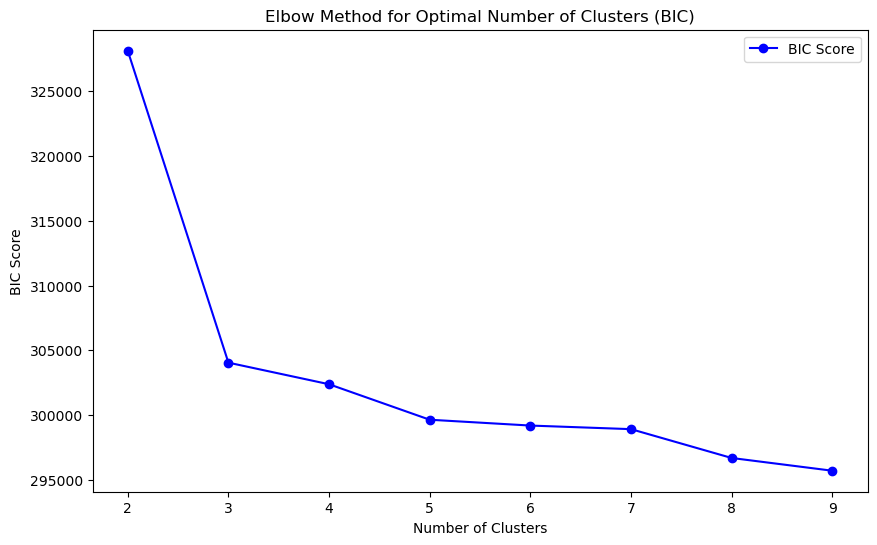

In [208]:
# Plot the BIC scores for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, bic_scores, marker='o', color='blue', label="BIC Score")
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('Elbow Method for Optimal Number of Clusters (BIC)')
plt.legend()
plt.show()


In [211]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []

In [213]:
for k in num_clusters_range:
    # Fit GMM with k clusters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_pca)
    
    # Predict cluster labels and calculate silhouette score
    cluster_labels = gmm.predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)


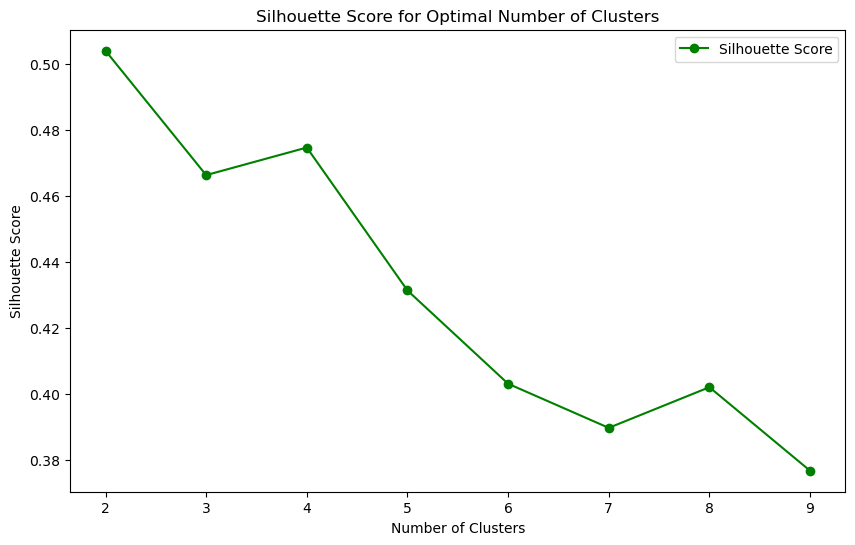

In [215]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o', color='green', label="Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.legend()
plt.show()


In [217]:
# Optimal number of clusters based on previous analysis
optimal_clusters = 2

In [219]:
# Fit GMM with the chosen number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, covariance_type='full', random_state=42)
gmm.fit(X_pca)


GaussianMixture(n_components=2, random_state=42)

In [221]:
# Predict cluster labels
cluster_labels = gmm.predict(X_pca)

In [223]:
# Add the cluster labels to the DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels


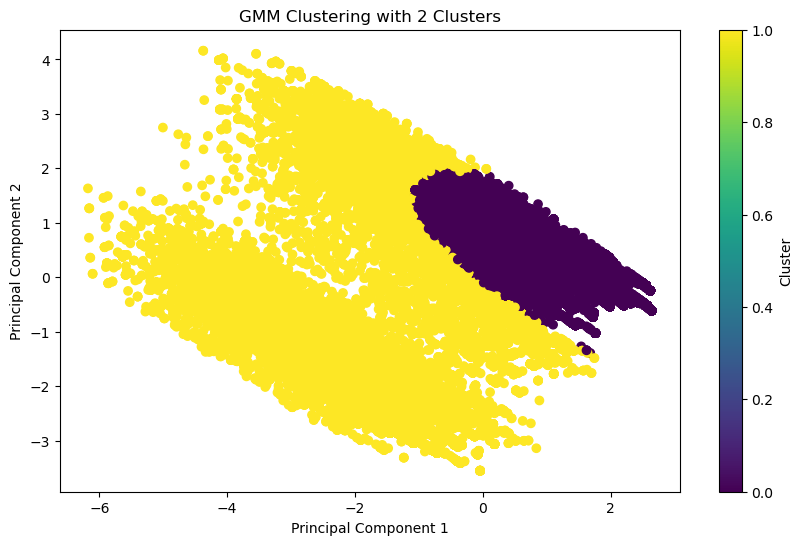

In [225]:
# Plot GMM Clustering Results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'GMM Clustering with {optimal_clusters} Clusters')
plt.colorbar(label='Cluster')
plt.show()

HeartDisease_Yes       0.0       1.0
Cluster                             
0                 0.627118  0.372882
1                 0.272043  0.727957


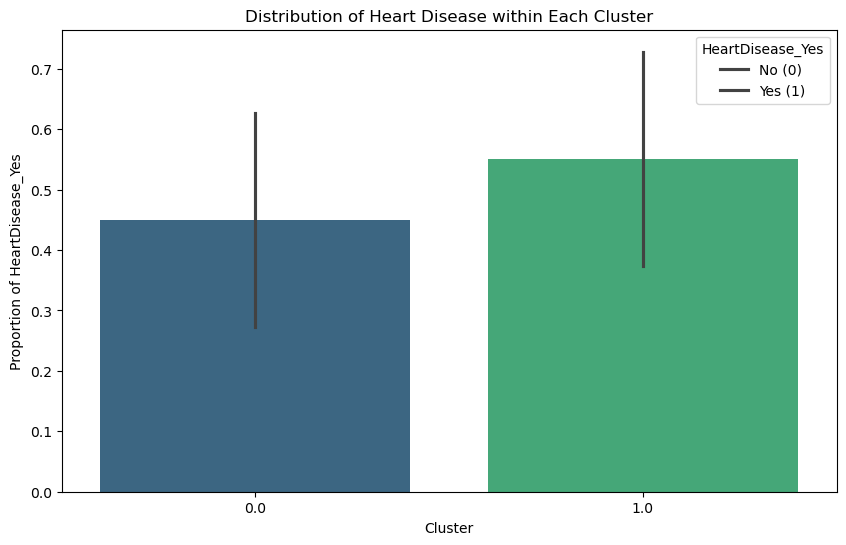

In [230]:
pca_df['HeartDisease_Yes'] = Y.values

# Calculate the distribution of HeartDisease_Yes within each cluster
cluster_distribution  = pca_df.groupby('Cluster')['HeartDisease_Yes'].value_counts(normalize=True).unstack()
print(cluster_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_distribution, palette='viridis')
plt.title("Distribution of Heart Disease within Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of HeartDisease_Yes")
plt.legend(title='HeartDisease_Yes', labels=['No (0)', 'Yes (1)'])
plt.show()